# Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel, chi2_contingency, f_oneway, chisquare, levene, shapiro, boxcox
%matplotlib inline
import os

# Downloading given Dataset

In [2]:
!gdown "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv"

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv
To: C:\Users\Dell\bike_sharing.csv

  0%|          | 0.00/648k [00:00<?, ?B/s]
100%|##########| 648k/648k [00:00<00:00, 12.1MB/s]


# Define Problem Statement and perform Exploratory Data Analysis (10 points)

# Problem Statement
Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

How well those variables describe the electric cycle demands.

From above business case Yulu is suffering some cosiderable dips in its revenues as loosing customers. Some of the factors given in the dataset as temp, atemp, windspeed, season, weather etc.... How they are affecting on the target attribute which is Number of cycles rented, need to be evaluated. Need to find out the revenue model like registered or casual users are impacting more.
or working day or holiday have significant impact or not. Also can be checked along weather and season as well.


# Creating Dataframe read given CSV file

In [3]:
df = pd.read_csv("C:/Users/Dell/bike_sharing.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


It contains 10886 rows and 12 columns , those are attributes to look upon and find out which are the most relevant one effecting the revenue of the Yulu Bike sharing company 

In [4]:
df.shape

(10886, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
#From data we see that no NULL values are present in the dataset. #We have total 10885 rows and 12 columns in given dataset

All the attributes except datetime are int or float.

In [7]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


#From the above descibe table we infer following insights.
1. The median temperature is noted at 20.5 degrees Celsius, while 75% of the data has been recorded at 26.24 degrees Celsius. The average temperature is noted as 20.36 degrees Celsius.

2. The Yulu has a median of 145 counted (casual + registered) users, with 75% of users totaling 284. The average number of counted users is 191.574. The maximum number of counted users is 977.

3. 68% of the data points are collected for the working day, which makes sense as a lot of people use public transportation on working days.

4. The average temperature was 20.23 degrees Celsius, with 20.5 happening 50% of the time.


In [8]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [9]:
#missing_values
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [10]:
#We see that we dont have missing values in our dataset.

we see that columns season, holiday, workingday, wheather are having unique values as 4,2,2,4 respectively.
So converting these 4 columns to category.

In [11]:
df.drop("datetime", axis = 1, inplace = True)

In [12]:
#changing it from object dtype to category  to save memory
df["season"]=df["season"].astype("category")
df["holiday"]=df["holiday"].astype("category")
df["workingday"]=df["workingday"].astype("category")
df["weather"]=df["weather"].astype("category")

In [13]:
cat_cols = df.dtypes == 'category'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['season', 'holiday', 'workingday', 'weather']

In [14]:
#Collecting all categorical variables in one array.

In [15]:
nume_cols = df.dtypes != "category"
nume_cols = list(nume_cols[nume_cols].index)
nume_cols

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

In [16]:
#Collecting all numerical variables in one array.

In [17]:
for i in df.columns:
    print(f'{i} has {df[i].nunique()} unique values')
    print(""*20)

season has 4 unique values

holiday has 2 unique values

workingday has 2 unique values

weather has 4 unique values

temp has 49 unique values

atemp has 60 unique values

humidity has 89 unique values

windspeed has 28 unique values

casual has 309 unique values

registered has 731 unique values

count has 822 unique values



# Univariate Analysis 

##Univariate Analysis for all the continuous varuiables such as atemp, temp, humidity,windspeed, casual, registered, count .
#So plotting displot of all

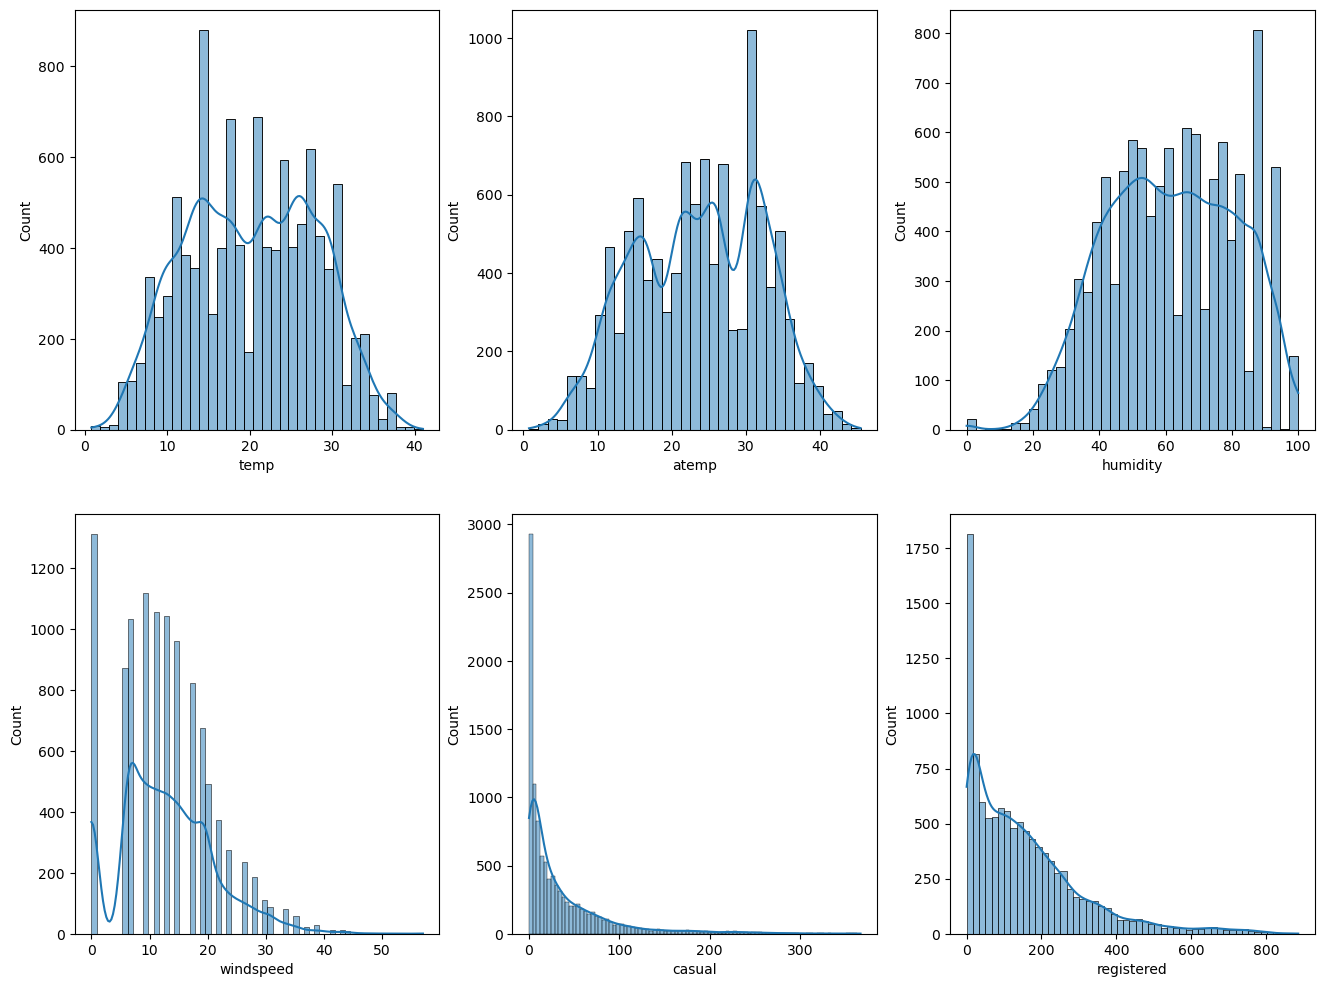

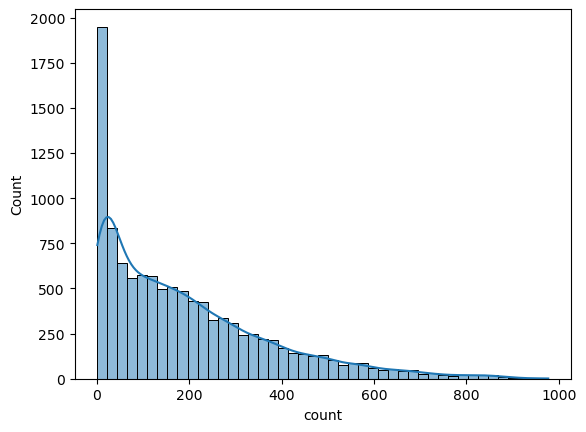

In [18]:
#nume_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[nume_cols[index]], ax=axis[row, col], kde=True)
        index += 1
        
plt.show()
sns.histplot(df[nume_cols[-1]], kde=True) 
plt.show()

#from the above histplots we can observe that
1. casual, registered and count somewhat looks like Log Normal Distribution
2. temp, atemp and humidity looks like they follows the Normal Distribution
3. windspeed follows the binomial distribution

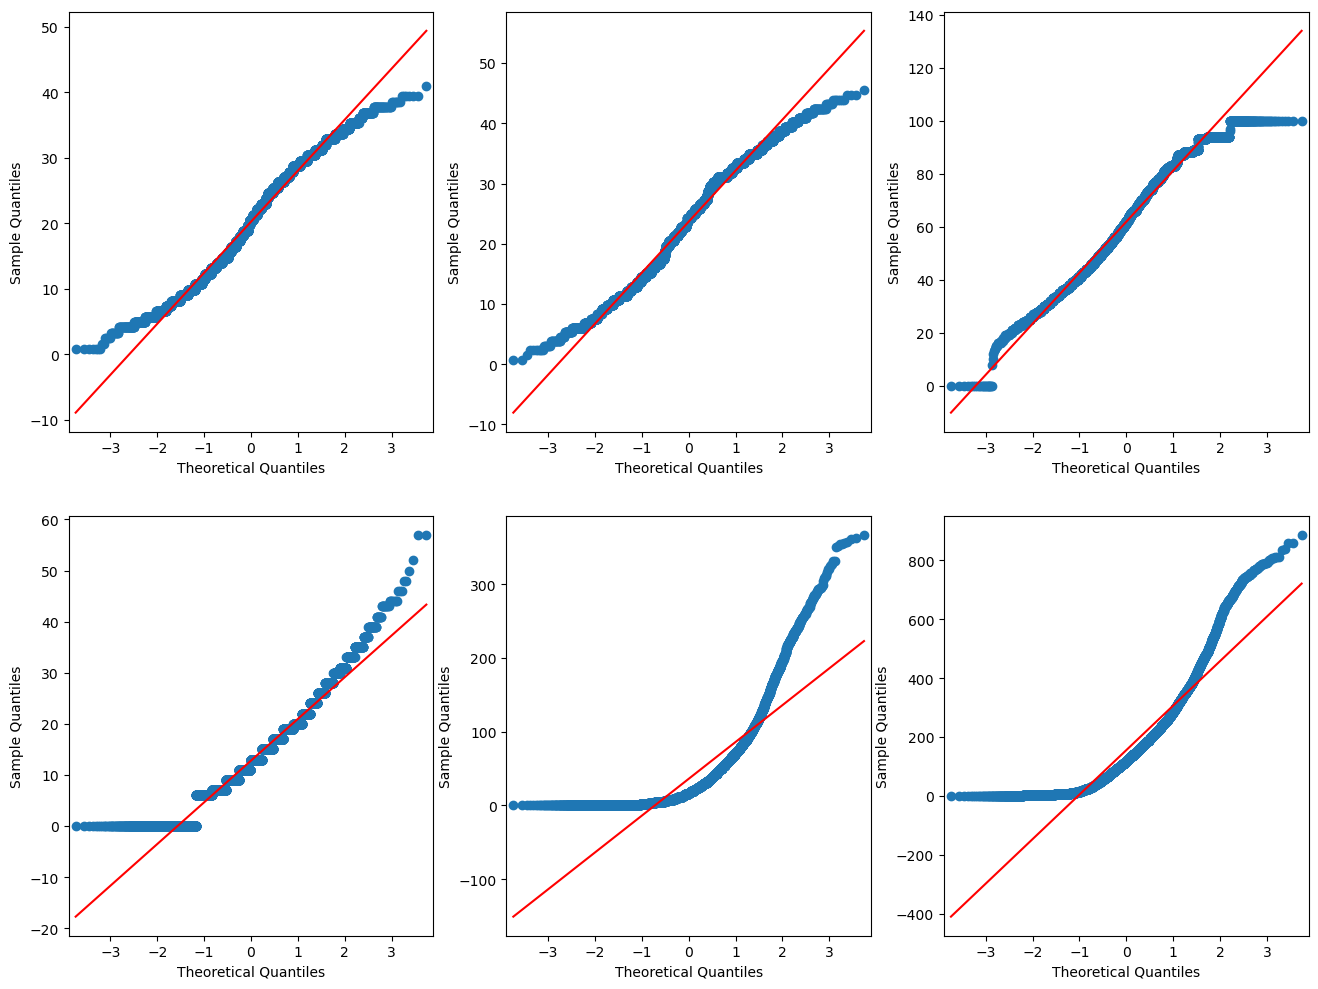

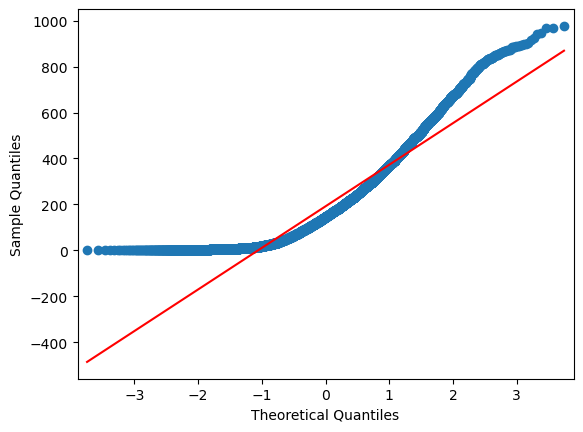

In [19]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        qqplot(df[nume_cols[index]], line="s", ax=axis[row, col])
        index += 1
        
qqplot(df[nume_cols[-1]], line = "s") 
plt.show()

#To verify for ANOVA assumptions we have plot qqplot of all the numerival attributes and can observe 
1. casual, registered and count somewhat looks like Log Normal Distribution are not aligned to red "S" line.
2. temp, atemp and humidity looks like they follows the Normal Distribution are aligned to red "S" line.
3. windspeed follows the binomial distribution not aligned to red "S" line.

In [20]:
##Now countplots for categorical variables which are season holiday workingday and weather

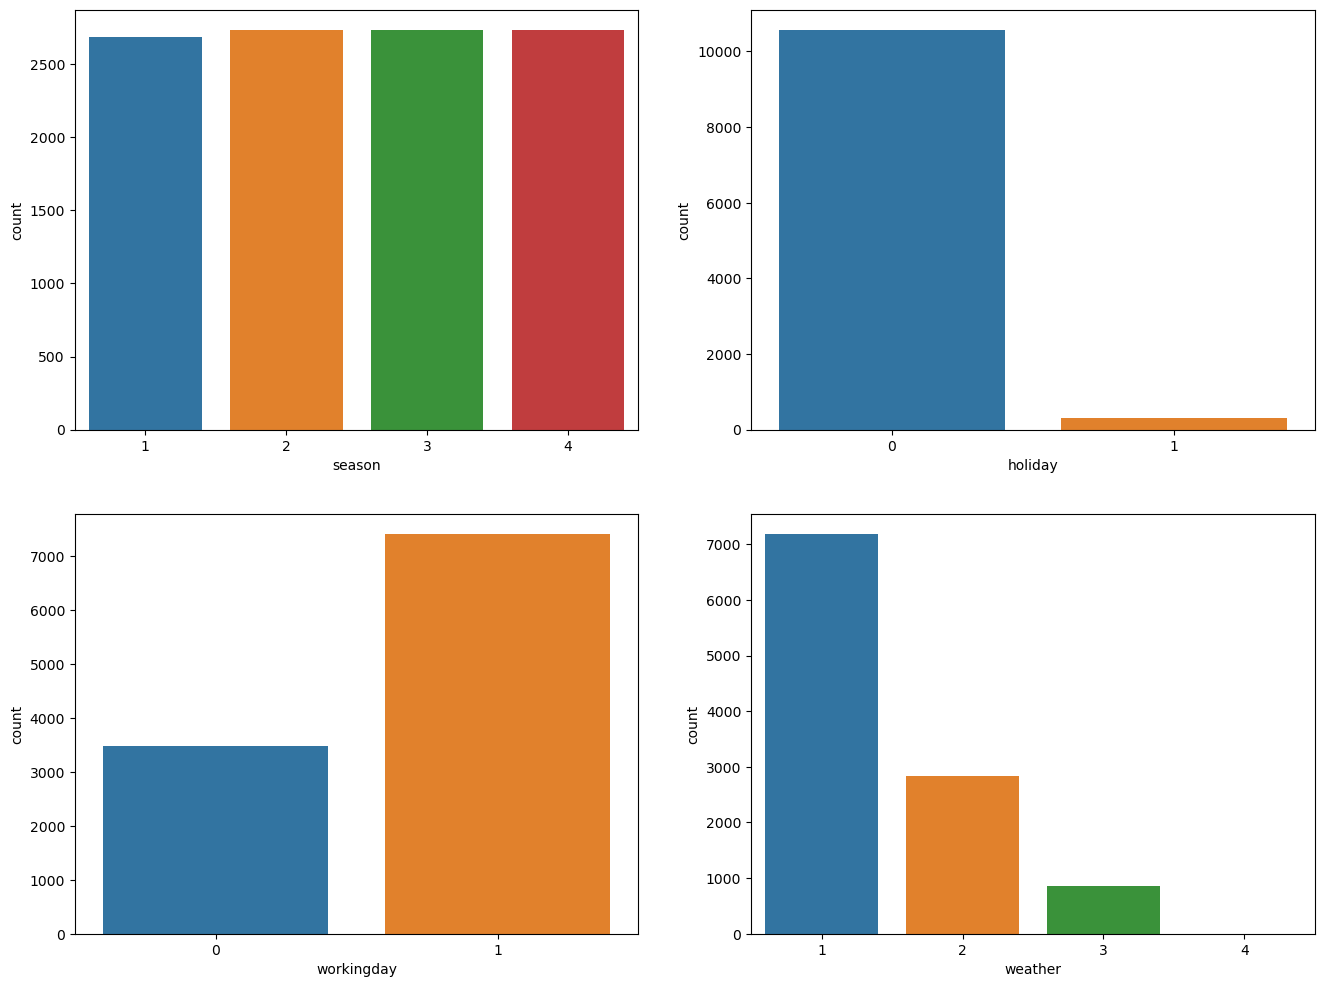

In [21]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(df[cat_cols[index]], ax=axis[row, col])
        index += 1
        
sns.countplot(df[cat_cols[-1]]) 
plt.show()

From above four countplots of categorical variables it is seen that.
1. Almost all season have same count. There exist negligible change in number.
2. More count on Holiday as compared to working day. 
3. Graph 2 we see It is highly imbalanced to holiday and working day, because a lot of people don't use vehicles on holiday
4. If seen in weather , weather 1 that is clear weather having the maximum demands for bike goes on decreasing as weather changes to mist and then light snow and almost negligible in the heavy rain. As it is much risky to use Bike in such a climate.
5. 1 more categorical variable is made so as to bin the count of number of bicycles rented in low, medium , high etc. which shows the lognormal distribution as maximum times Low and then for different High values for many reasons.
6. Data looks common as it should be like equal number of days in each season, more working days and weather is mostly Clear, Few clouds, partly cloudy, partly cloudy.

# Bivariate Analysis 

<AxesSubplot:xlabel='season', ylabel='count'>

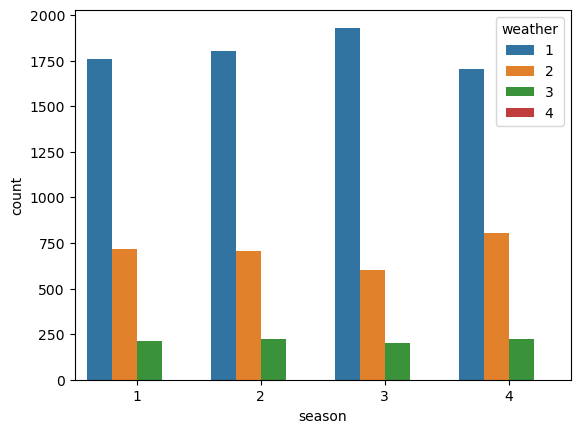

In [22]:
sns.countplot(df['season'], hue=df['weather'], data = df)

Whatever may be the season is the weather has a strong impact as clear wheather Most demand then mist and then light snow. And heavy rain no demand is shown from the above plot

<AxesSubplot:xlabel='season', ylabel='count'>

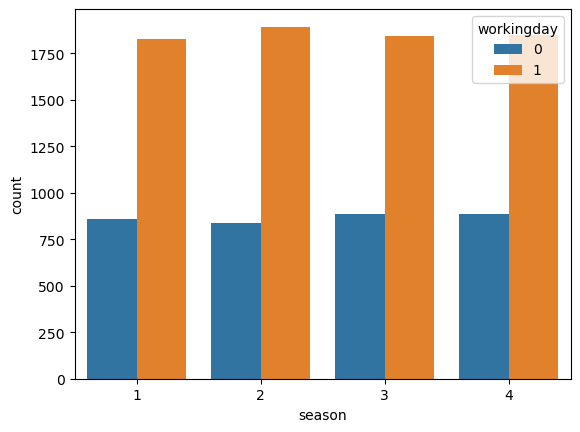

In [23]:
sns.countplot(df['season'], hue=df['workingday'])

Working day having more demand. As employees must be using it to travel to their offices.

<AxesSubplot:xlabel='holiday', ylabel='count'>

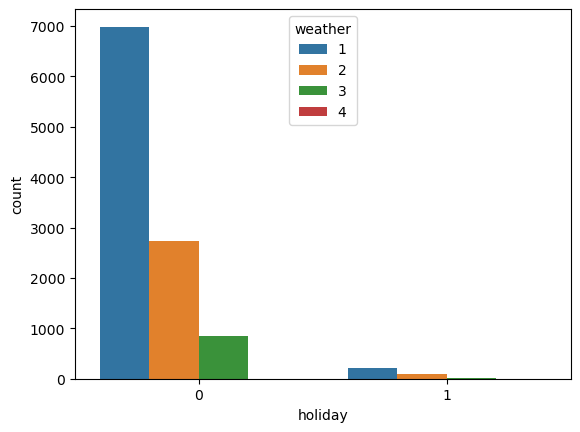

In [24]:
sns.countplot(df['holiday'], hue=df['weather'])

#More demand of Yulu bikes is on working day . As it can be used and a transport to commute to their offices.

<AxesSubplot:xlabel='season', ylabel='count'>

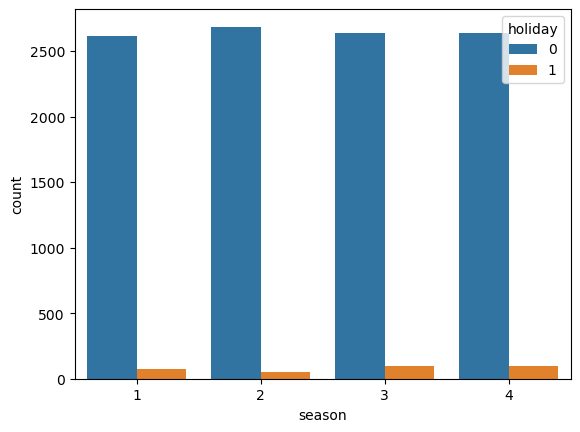

In [25]:
sns.countplot(df['season'], hue=df['holiday'])

#In any season it is mostly used on working days.

In [26]:
##Checking for outliers. Plotting boxplot for all the numerical columns.

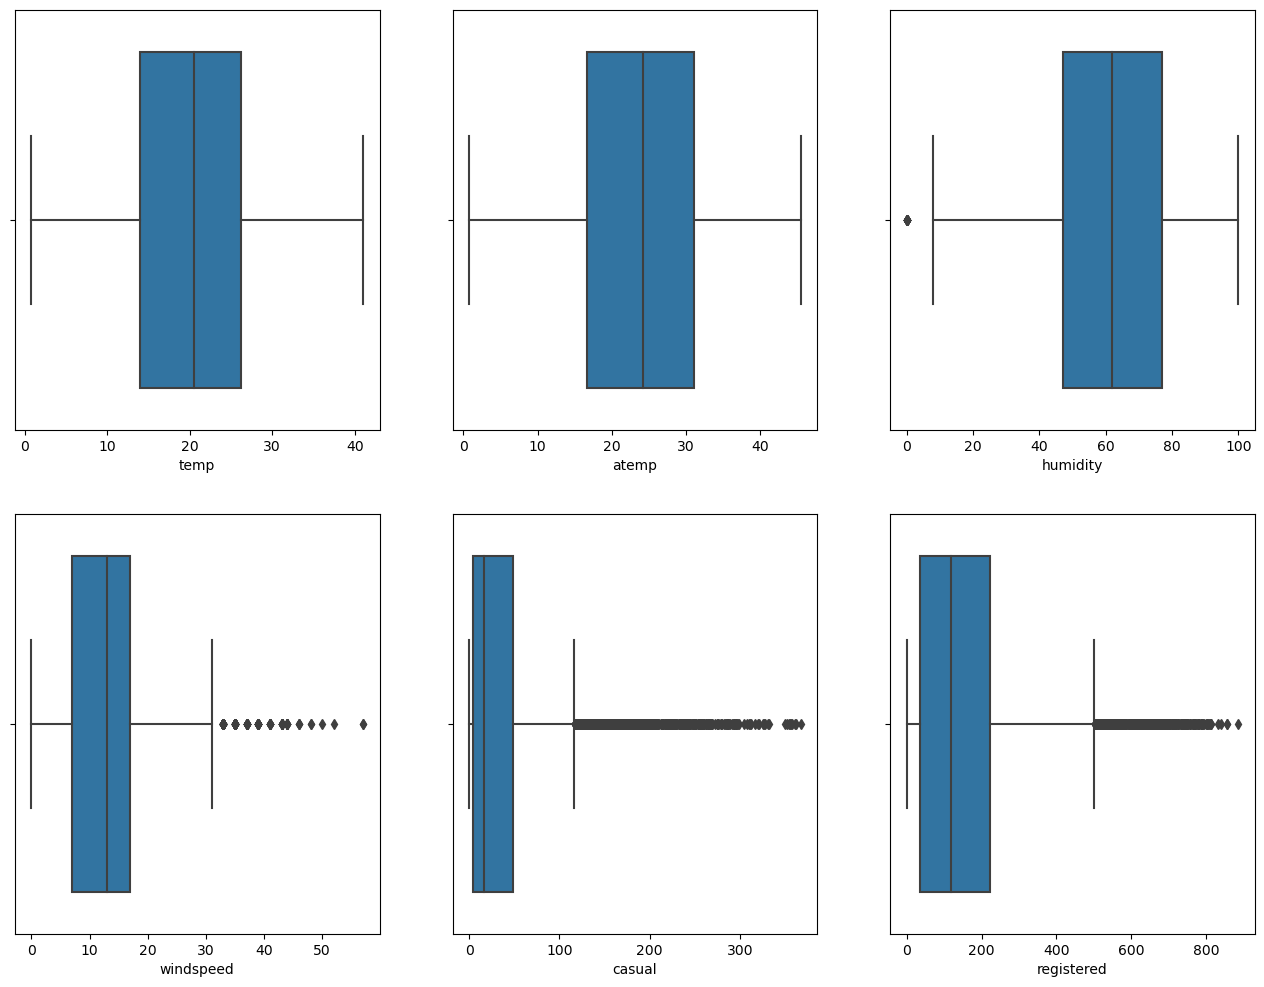

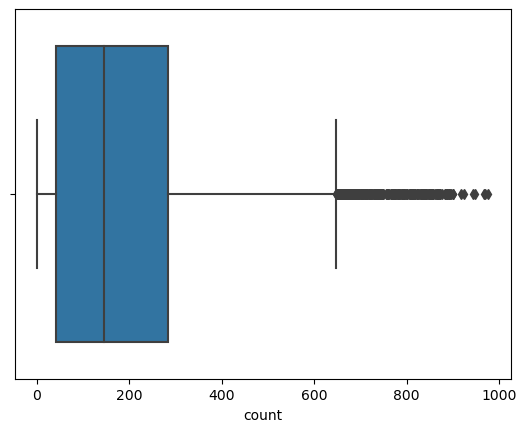

In [27]:

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(df[nume_cols[index]], ax=axis[row, col])
        index += 1
        
plt.show()
sns.boxplot(df[nume_cols[-1]]) 
plt.show()

In [28]:
#Here we observe be have outliers present for numerical columns such as count, windspeed, casual and registered. 

# Bin Count

In [29]:
bins=[0,40,100,200, 300, 500, 700, 900, 1000]
group=['Low','Average','medium', 'H1', 'H2', 'H3', 'H4' , 'Very high']

In [30]:
df['Rent_count']= pd.cut(df['count'],bins,labels=group) # Create new categorical column

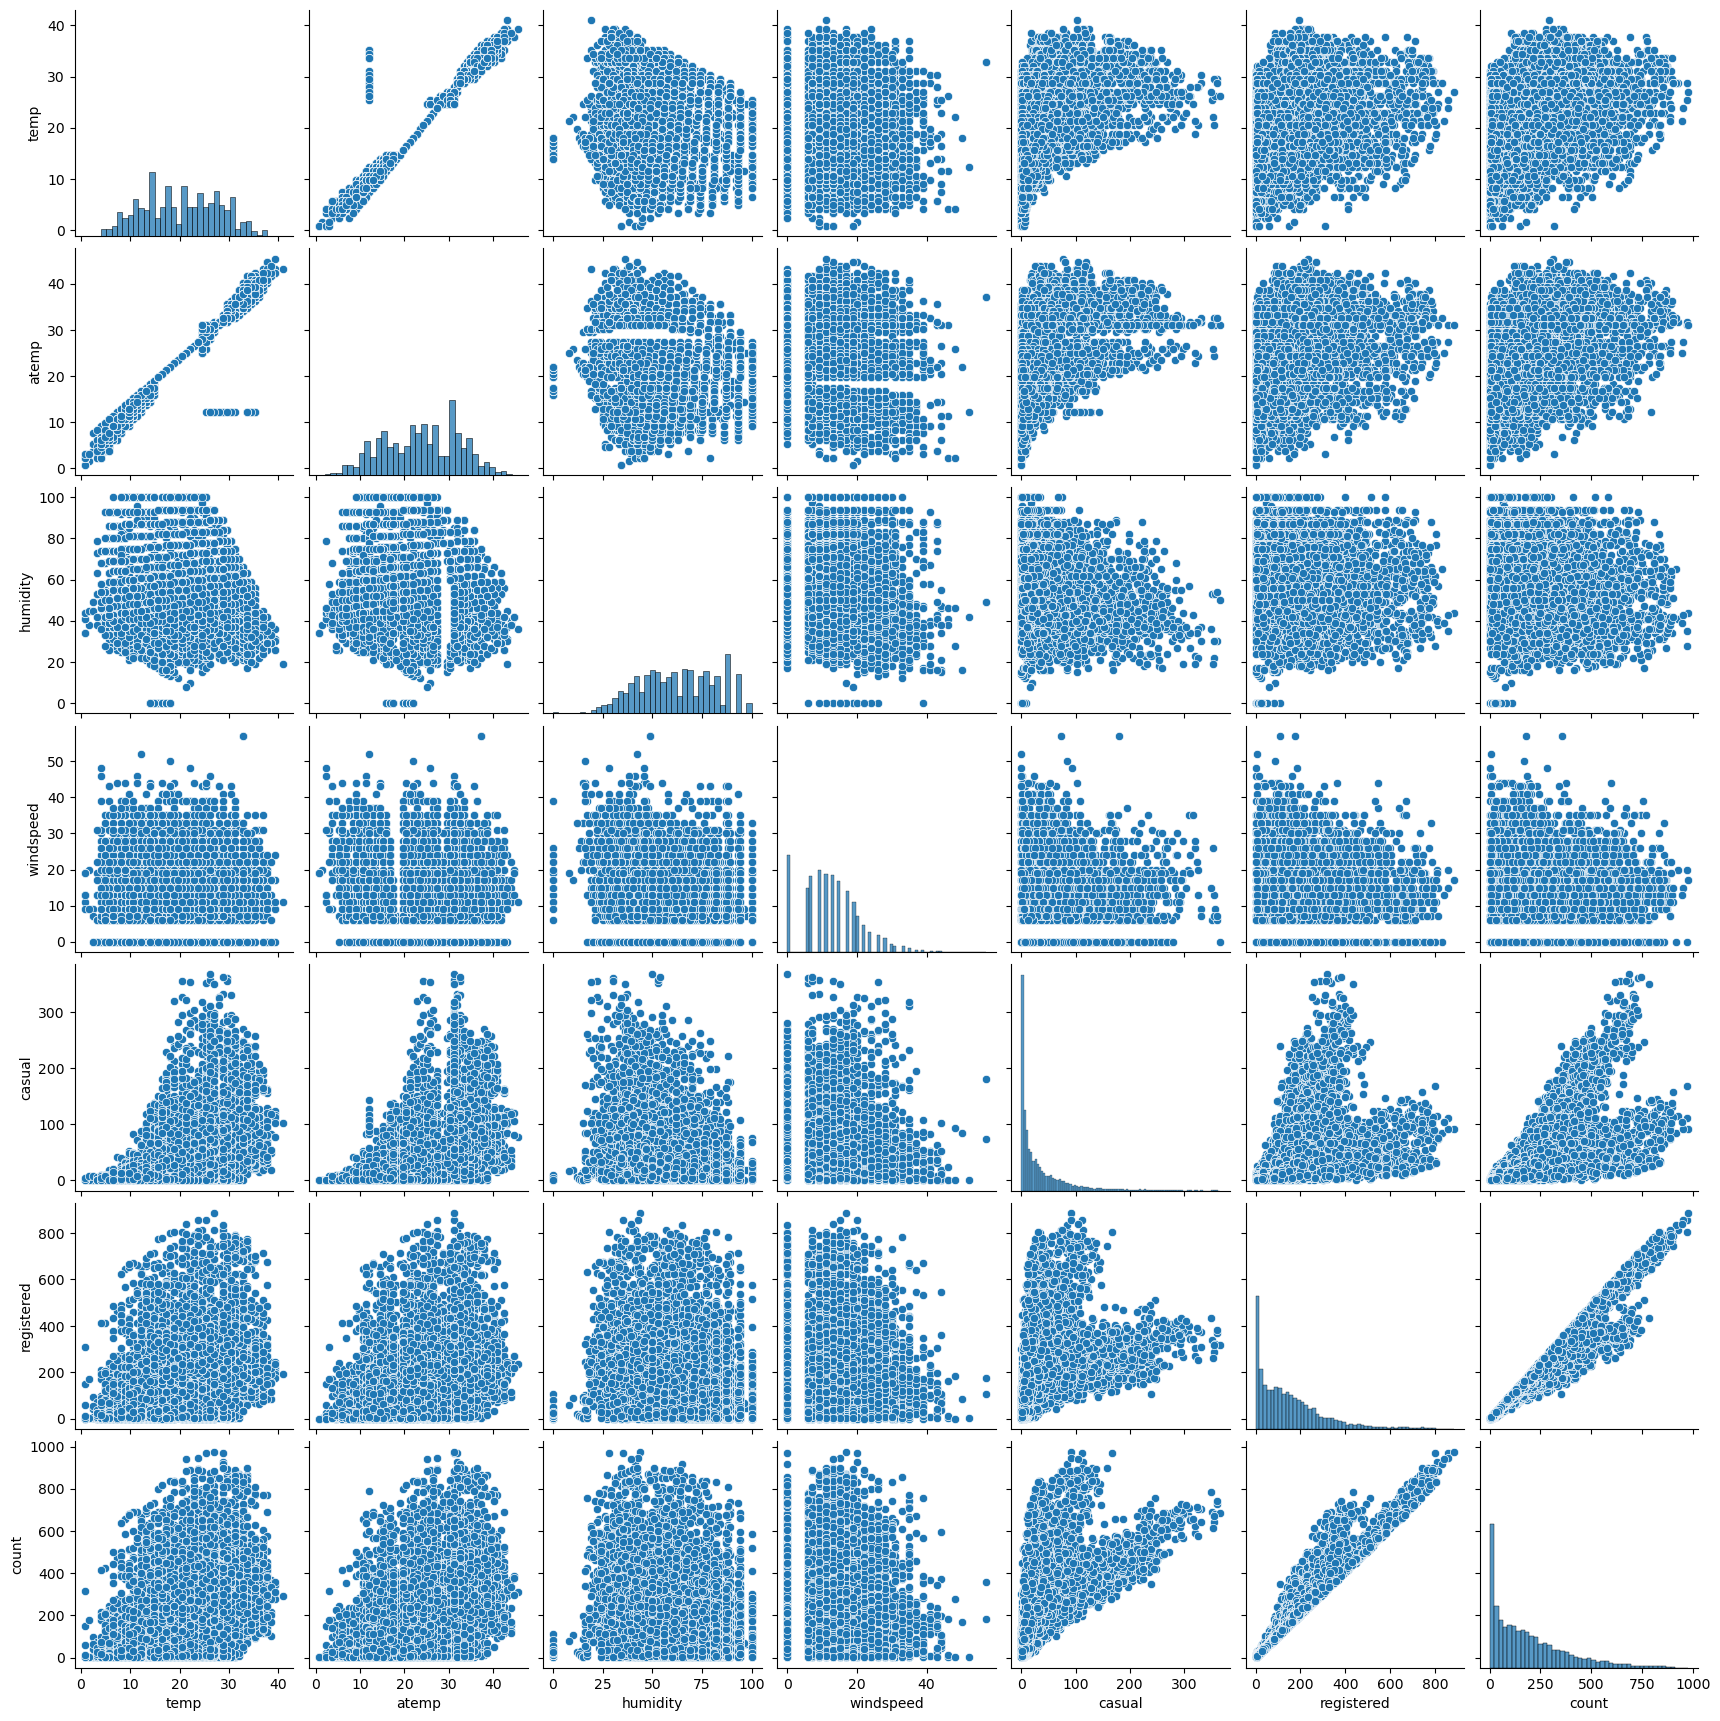

In [31]:
sns.pairplot(df)

# Bivariate Analysis 

(Relationships between important variables such as workday and count, season and count, weather and count.
As count was continuous variable I have binned it in to the categories as Rent_count Low, average, Medium, H1,H2,H3,H4,Very High

<AxesSubplot:xlabel='season', ylabel='count'>

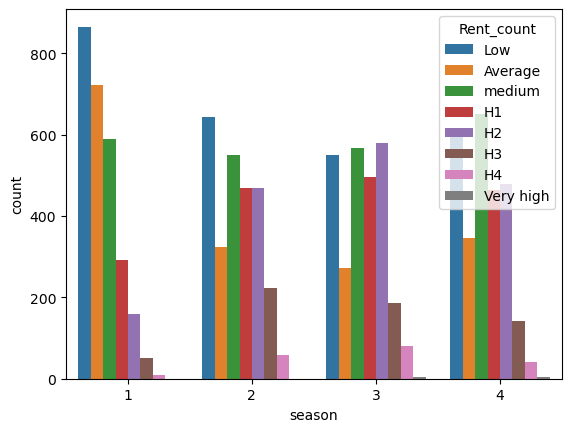

In [32]:
sns.countplot(df['season'], hue=df['Rent_count'])

<AxesSubplot:xlabel='Rent_count', ylabel='count'>

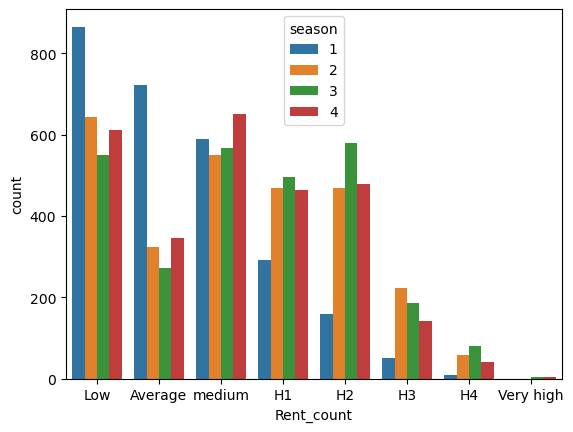

In [33]:
sns.countplot(df['Rent_count'], hue=df['season'])

<AxesSubplot:xlabel='weather', ylabel='count'>

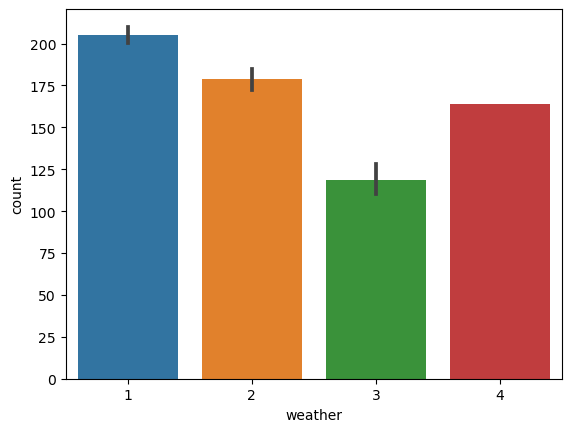

In [34]:
sns.barplot(df['weather'], df['count'])

<AxesSubplot:xlabel='Rent_count', ylabel='count'>

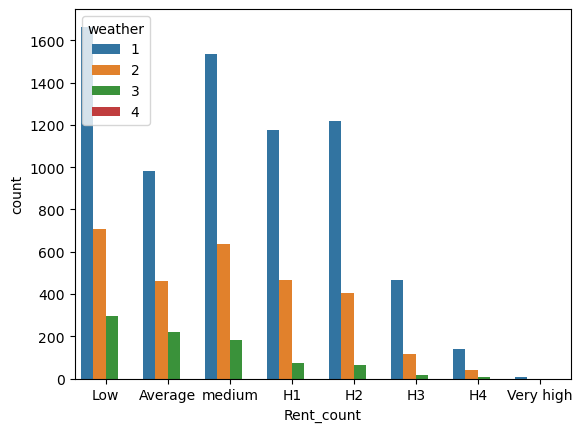

In [35]:
sns.countplot(df['Rent_count'], hue=df['weather'])

<AxesSubplot:xlabel='workingday', ylabel='count'>

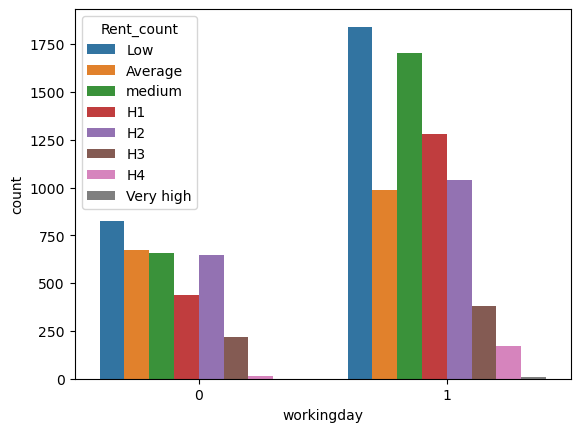

In [36]:
sns.countplot(df['workingday'], hue=df['Rent_count'])

<AxesSubplot:xlabel='Rent_count', ylabel='count'>

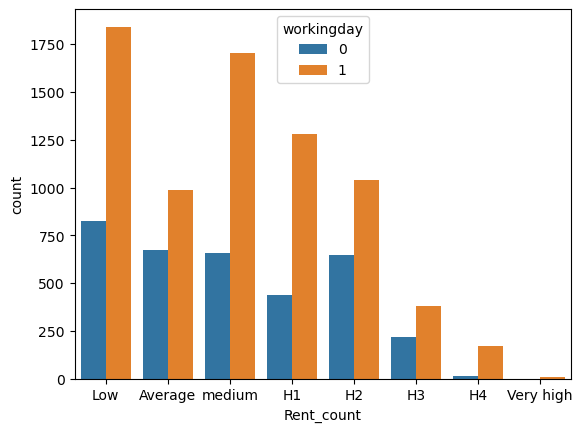

In [37]:
sns.countplot(df['Rent_count'], hue=df['workingday'])

<AxesSubplot:xlabel='holiday', ylabel='count'>

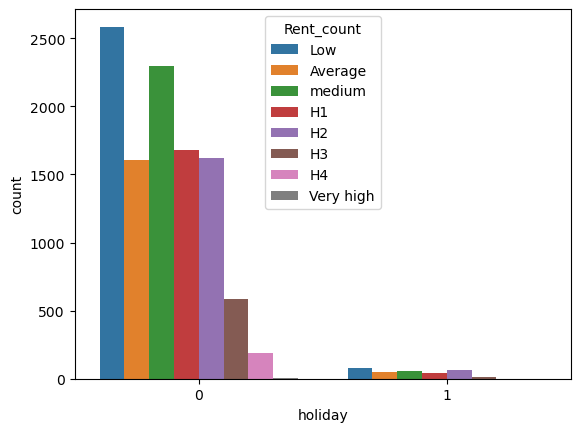

In [38]:
sns.countplot(df['holiday'], hue=df['Rent_count'])

([<matplotlib.patches.Wedge at 0x2b2ea2d2790>,
 [Text(-0.6067654144600506, 0.9175160662435963, 'working day counts'),
  Text(0.6067653285559936, -0.9175161230530706, 'non-working day counts')])

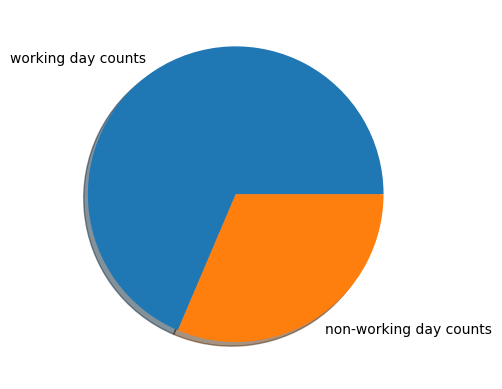

In [39]:
plt.pie([df.loc[df['workingday']==1]['count'].sum(),df.loc[df['workingday']==0]['count'].sum()],
       labels=['working day counts','non-working day counts'],
        shadow=True
       )

Illustrate the insights based on EDA
Comments on range of attributes, outliers of various attributes
Comments on the distribution of the variables and relationship between them
Comments for each univariate and bivariate plots

1. In summer and fall seasons more bikes are rented as compared to other seasons.
2. Whenever its a holiday more bikes are rented.
3. It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
4. Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.

Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary

# 2 sample t test
Perfoming 2 sample t test on working day and non working day counts.

Taking significant level(alpha) as 0.05 for all test.

considreing: Null hypothesis Ho = mean of count of bike on non working day is equal to mean of counts of bike on working day.

Alternate hypothesis Hn = mean of count of bike on non working day is not equal to mean of counts of bike on working day.


<AxesSubplot:ylabel='Density'>

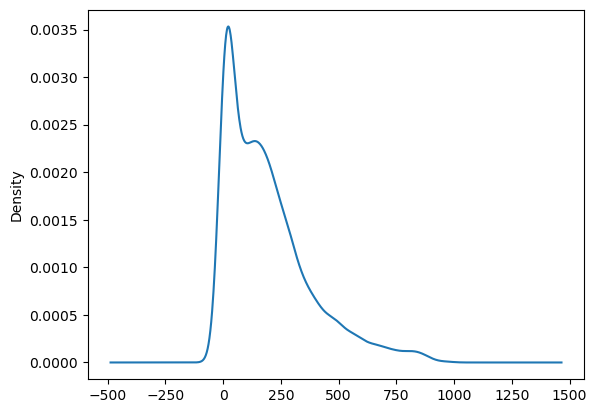

In [40]:
df.loc[df['workingday']==1]['count'].plot(kind='kde')

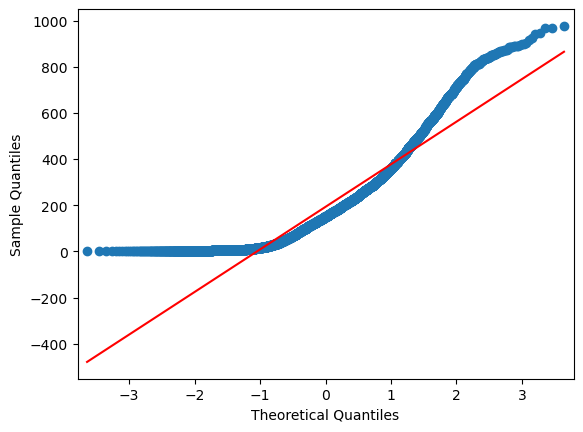

In [41]:
x=df.loc[df['workingday']==1]['count']
sm.qqplot(x, dist=stats.norm, line='s');

In [42]:
#The distribution does not follows normal distribution

df1=df.loc[df['workingday']==1]['count'].reset_index()

df1.drop(['index'], axis=1, inplace=True)

df2=df.loc[df['workingday']==0]['count'].reset_index()

df2.drop(['index'], axis=1, inplace=True)

ttest,p_value=ttest_ind(df1,df2)

print("p_value = ",p_value)


p_value =  [0.22644804]



Since the P value is greater than 0.05 hence null hypotheis has failed to reject.

So we can say that non non working day has no effect on counts of bike.

# Hypothesis Testing (30 Points):


2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented (10 points)
ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season (10 points)
Chi-square test to check if Weather is dependent on the season (10 points)


In [43]:
t_stat, p_value = levene(df["count"],df["workingday"])
p_value
alpha = 0.5


2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented (10 points)
H0 = There is no effect of Working Day on the number of electic cycles rented.
Ha = There is an effect of WorkingDay on the number of electric cycles rented.
Right/Left/Two_tailed
Test_statistic Using ttest_ind 

In [44]:
ttest_ind(df["count"], df["workingday"])

Ttest_indResult(statistic=109.95076974934595, pvalue=0.0)

In [45]:
population_mean_count = df["count"].mean()
population_mean_count

191.57413191254824

Select an appropriate test to check whether:
1. Working Day has effect on number of electric cycles r of cycles rented similar or different ented
2. No.in different seasons
3. No. of cycles rented similar or different in different weather
4. Weather is dependent on season (check between 2 predictor variable)

First 3 statements to chk are having one Numerical variable i.e. Count and one Categorical_variable as working Day or seasons or Weather.
So For these type of questions we use ttest or Anova i.e (Numeric, catagorical)

4th one is both the categorical variables so use Chisquare or chi2_contingency test.

In [46]:
#1.Working Day has effect on number of electric cycles rented
population_mean_count = df["count"].mean()
population_mean_count

191.57413191254824

In [47]:
df_workingday_count = df[df["workingday"] == 1]["count"]
df_workingday_count.mean()

193.01187263896384

In [48]:
df_non_workingday_count = df[df["workingday"] == 0]["count"]
df_non_workingday_count.mean()

188.50662061024755

# Using ANOVA

In [49]:
#H0 = Working day does not have any effect on number of cycles rented.
#HA = Working day has an positive effect on number of cycles rented. i.e. mu1 > mu2
# We consider it  to be Right Tailed
#Test Statistic and p_value
#We will consider alpha as 0.01 significance value. i.e 99% confidence
alpha = 0.01
f_stat, p_value = f_oneway(df_workingday_count,df_non_workingday_count)
print(f"Test statistic = {f_stat} pvalue = {p_value}")
if (p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Test statistic = 1.4631992635777575 pvalue = 0.22644804226428558
Fail to reject Null Hypothesis


# Using ttest

In [50]:
#H0 = Working day does not have any effect on number of cycles rented.
#HA = Working day has an effect on number of cycles rented. mu1 > m2
# We consider it to be Righ Tailed.
#Test Statistic and p_value
#We will consider alpha as 0.01 significance value. i.e 99% confidence
alpha = 0.01
t_stat, p_value = ttest_ind(df_workingday_count,df_non_workingday_count, alternative = "greater")
print(f"Test statistic = {t_stat} pvalue = {p_value}")
if (p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Test statistic = 1.2096277376026694 pvalue = 0.11322402113180674
Fail to reject Null Hypothesis


# 2.No. of cycles rented similar or different in different seasons
#As we have 4 different seasons ttest will not work here. Need to use ANOVA
#Using ANOVA

In [51]:
df_season1_spring  = df[df["season"] == 1]["count"]
df_season1_spring_subset = df_season1_spring.sample(100)

In [52]:
df_season2_summer  =df[df["season"] == 2]["count"]
df_season2_summer_subset = df_season2_summer.sample(100)

In [53]:
df_season3_fall = df[df["season"] == 3]["count"]
df_season3_fall_subset = df_season3_fall.sample(100)

In [54]:
df_season4_winter = df[df["season"] == 4]["count"]
df_season4_winter_subset = df_season4_winter.sample(100)

In [55]:
#We have taken samples of each dataframe to send it to shapiro as Shapiro test 

checking for assumptions:

In [56]:
#Levene's Test

In [57]:
#H0 = All samples have equal variance 
#HA = At least one sample will have different variance
t_stat, p_value = levene(df_season1_spring, df_season2_summer, df_season3_fall, df_season4_winter)
p_value

1.0147116860043298e-118

#Shapiro == Test for normality
#We are taking samples of the available data. As it works well with (50 to 200) values. So we have created subset of each of 100 values.

In [58]:
#H0 = Sample is drawn from NormalDistribution
#HA = Sample is not from Normal Distribution
##Here we are considering alpha (significance value as ) 0.05

t_stat, pvalue = shapiro(df_season1_spring_subset)
if pvalue < 0.05:
    print("Reject H0 Data is not Gaussian")
else:
    print("Fail to reject Data is Gaussian")

Reject H0 Data is not Gaussian


In [59]:
t_stat, pvalue = shapiro(df_season2_summer_subset)
if pvalue < 0.05:
    print("Reject H0 Data is not Gaussian")
else:
    print("Fail to reject Data is Gaussian")

Reject H0 Data is not Gaussian


In [60]:
t_stat, pvalue = shapiro(df_season3_fall_subset)
if pvalue < 0.05:
    print("Reject H0 Data is not Gaussian")
else:
    print("Fail to reject Data is Gaussian")

Reject H0 Data is not Gaussian


In [61]:
t_stat, pvalue = shapiro(df_season4_winter_subset)
if pvalue < 0.05:
    print("Reject H0 Data is not Gaussian")
else:
    print("Fail to reject Data is Gaussian")

Reject H0 Data is not Gaussian


In all the above 4 test we got p_value almost 0.0 (like 10^-6 or so) which is less than alpha so we Reject the Null Hypothesis of these samples from Normal Distribution

#From above we can say that none of the samples are from Normal distribution. So Anova assumption fails here. But still we will go ahead with the test as it is mentioned in the problem statement.

In [62]:
#t_stat, p_value = kruskal

In [63]:
#H0 = season does not have any effect on number of cycles rented.
#HA = At least one season out of four (1:spring, 2:summer,3:fall, 4:winter) has an effect on number of cycles rented.
#Righ Tailed /Left/Two
#Test Statistic and p_value
#We will consider alpha as 0.01 significance value. i.e 99% confidence
alpha = 0.01

f_stat, p_value = f_oneway(df_season1_spring, df_season2_summer, df_season3_fall, df_season4_winter)
print(f"Test statistic = {f_stat} pvalue = {p_value}")
if (p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Test statistic = 236.94671081032106 pvalue = 6.164843386499654e-149
Reject Null Hypothesis


# 3.No. of cycles rented similar or different in different weather
#As we have 4 different weather ttest will not work here. Need to use ANOVA

In [64]:
df_weather1_clear  = df[df["weather"] == 1]["count"]
df_weather1_clear.mean()

205.23679087875416

In [65]:
df_weather2_Mist  = df[df["weather"] == 2]["count"]
df_weather2_Mist.mean()

178.95553987297106

In [66]:
df_weather3_LightSnow  = df[df["weather"] == 3]["count"]
df_weather3_LightSnow.mean()

118.84633294528521

In [67]:
df_weather4_HeavyRain  = df[df["weather"] == 4]["count"]
df_weather4_HeavyRain.mean()

164.0

In [68]:
#checking for assumptions

In [69]:
#levene's Test = It is chexking for variance

In [70]:
#H0 = All samples have equal variance 
#HA = At least one sample will have different variance
t_stat, p_value = levene(df_weather1_clear, df_weather2_Mist, df_weather3_LightSnow, df_weather4_HeavyRain)
p_value

3.504937946833238e-35

In [71]:
#Shapiro == Test for normality

In [72]:
#H0 = Sample is drawn from NormalDistribution
#HA = Sample is not from Normal Distribution
##Here we are considering alpha (significance value as ) 0.05

shapiro(df_weather1_clear)

ShapiroResult(statistic=0.8909230828285217, pvalue=0.0)

In [73]:
shapiro(df_weather2_Mist)

ShapiroResult(statistic=0.8767687082290649, pvalue=9.781063280987223e-43)

In [74]:
shapiro(df_weather3_LightSnow)

ShapiroResult(statistic=0.7674332857131958, pvalue=3.876090133422781e-33)

In [75]:
#shapiro(df_weather4_HeavyRain)

In [76]:
df_weather4_HeavyRain

5631    164
Name: count, dtype: int64

# using ANOVA

In [77]:
#H0 = weather does not have any effect on number of cycles rented.
#HA = At least one weather out of four (1: clear, 2: Mist, 3:Light snow, 4:Heavy Rain) has an effect on number of cycles rented.
#Righ Tailed /Left/Two
#Test Statistic and p_value
#We will consider alpha as 0.01 significance value. i.e 99% confidence
alpha = 0.01
f_stat, p_value = f_oneway(df_weather1_clear,df_weather2_Mist,df_weather3_LightSnow,df_weather4_HeavyRain)
print(f"Test statistic = {f_stat} pvalue = {p_value}")
if (p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Test statistic = 65.53024112793271 pvalue = 5.482069475935669e-42
Reject Null Hypothesis


In [78]:
#H0 = weather does not have any effect on number of cycles rented.
#HA = At least one weather out of four (1: clear, 2: Mist, 3:Light snow, 4:Heavy Rain) has an effect on number of cycles rented.
#Righ Tailed /Left/Two
#Test Statistic and p_value
#We will consider alpha as 0.01 significance value. i.e 99% confidence
alpha = 0.01
f_stat, p_value = f_oneway(df_weather1_clear,df_weather2_Mist,df_weather3_LightSnow)
print(f"Test statistic = {f_stat} pvalue = {p_value}")
if (p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Test statistic = 98.28356881946706 pvalue = 4.976448509904196e-43
Reject Null Hypothesis


# Conclusion

#As we can see he pvalue is very very very low and we are Rejecting Null Hypothesis becasue we see weather 4 having rent count negligible and clear and lightsnow have good number of bikes rented. So it does impact and not all similar. 

# 4.Weather is dependent on season (check between 2 predictor variable)

# 4.Using chisquare_test 

In [79]:
val = pd.crosstab(index = df["weather"], columns = df["season"])
print(val)
chisquare(val)

season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0


Power_divergenceResult(statistic=array([2749.33581534, 2821.39590194, 3310.63995609, 2531.07388442]), pvalue=array([0., 0., 0., 0.]))

# 4.Using chi2_contigency test

In [80]:
#H0 = Weather is not dependent (Independent) on season.
#HA = Weather is dependent on Season
#Righ Tailed /Left/Two
#Test Statistic and p_value
#We will consider alpha as 0.01 significance value. i.e 99% confidence
alpha = 0.01
val = pd.crosstab(index = df["weather"], columns = df["season"])
#print(val)
chi_stat, p_value, df, confusion_matrix = chi2_contingency(val)
print(f"Test statistic = {chi_stat} pvalue = {p_value}")  #degree of freedom (df) = {df}")
#print("The confusion matrix is :")
#print(confusion_matrix)
if (p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")
    



Test statistic = 49.15865559689363 pvalue = 1.5499250736864862e-07
Reject Null Hypothesis


# Conclusion:

We reject NULL hypothesis that is Weather is independent from season at significance 0.01 we get that the p_value comes out to very low and These 2 attributes are strongly dependent on each other.

# Insights

1. A 2-sample T-test on working and non-working days with respect to count,implies that the mean population count of both categories are the same.

2. An ANOVA test on different seasons with respect to count,implies that population count means under different seasons are not the same, meaning there is a difference in the usage of Yulu bikes in different seasons.

3. By performing an ANOVA test on different weather conditions except 4 with respect to count, we can infer that population count means under different weather conditions are the same, meaning there is a difference in the usage of Yulu bikes in different weather conditions.

4. By performing a Chi2 test on season and weather (categorical variables), we can infer that there is an impact on weather dependent on season.

5. The maximum number of holidays can be seen during the fall and winter seasons.

6. There is a positive corelation between counts and temperature.

7. There is a negative corelation between counts and humidity.

8. More number of counts when weather is clear with less clouds, proved by annova hypothesis test.


# Recommendations:
1. As casual users are very less Yulu should focus on marketing startegy to bring more customers. for eg. first time user discount, friends and family discounts, referral bonuses etc.
2. On non working days as count is very low Yulu can think on the promotional activities like city exploration competition, some health campaigns etc.
3. In heavy rains as rent count is very low Yulu can introduce a different vehicle such as car or having shade or protection from that rain.
